<a href="https://colab.research.google.com/github/SGRGit/gwBICoherenceML/blob/draft/gwBICoherenceClassification_testing_run1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os
base_dir = "gdrive/My Drive/Colab Notebooks/gwBICoherenceFiles/"
seta = 'BBH'
setb = 'Glitch'

data_dir = os.path.join(base_dir, 'Data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [6]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [0]:
import numpy as np
import cv2
q1 = np.empty((1, 150, 150, 3))
q2 = np.empty((1, 150, 150, 3))
for a in range(1, len(seta_data_fnnames), 1):
  img_path_a = os.path.join(seta_data_dir, seta_data_fnnames[a])
  img_a = cv2.imread(os.path.join(seta_data_dir, seta_data_fnnames[a]))
  img_a = cv2.resize(img_a, (150, 150))
  q1 = np.vstack((q1, img_to_array(img_a).reshape(1, 150, 150, 3)))
  t1 = np.ones([len(seta_data_fnnames),1])
  
for b in range(1, len(setb_data_fnnames), 1):
  img_path_b = os.path.join(setb_data_dir, setb_data_fnnames[b])
  img_b = cv2.imread(os.path.join(setb_data_dir, setb_data_fnnames[b]))
  img_b = cv2.resize(img_b, (150, 150))
  q2 = np.vstack((q2, img_to_array(img_b).reshape(1, 150, 150, 3)))
  t2 = np.zeros([len(setb_data_fnnames),1])

In [0]:
t = np.vstack((t1, t2))
q = np.vstack((q1, q2))

In [9]:
len(t)

2652

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(q, t, test_size=0.1, shuffle=True)

In [11]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import regularizers

img_input = layers.Input(shape=(150, 150, 3))

# 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(128, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(256, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
#x = layers.Conv2D(512, 3, activation = 'relu')(x)

# Faltten Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algoritm
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(1000, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0.5,noise_shape=None, seed=None)(x)

# Fully connected layers and sigmoid activation algorithm
output = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(img_input, output)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0     

In [13]:
import tensorflow as tf
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005),
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# Train model (use 10% of training set as validation set)
#model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=10, verbose=2)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

# Train model (use validation data as validation set)
#model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

Train on 2147 samples, validate on 239 samples
Epoch 1/5
2147/2147 [==============================] - 352s 164ms/sample - loss: 114.3428 - acc: 0.4998 - val_loss: 0.7637 - val_acc: 0.4937
Epoch 2/5
2147/2147 [==============================] - 344s 160ms/sample - loss: 0.7190 - acc: 0.5165 - val_loss: 0.6852 - val_acc: 0.4937
Epoch 3/5
2147/2147 [==============================] - 343s 160ms/sample - loss: 0.7053 - acc: 0.5612 - val_loss: 0.6613 - val_acc: 0.6067
Epoch 4/5
2147/2147 [==============================] - 343s 160ms/sample - loss: 0.6335 - acc: 0.6861 - val_loss: 0.5572 - val_acc: 0.6820
Epoch 5/5
2147/2147 [==============================] - 342s 159ms/sample - loss: 0.5339 - acc: 0.7736 - val_loss: 0.6015 - val_acc: 0.9079


Train: 0.654, Test: 0.648


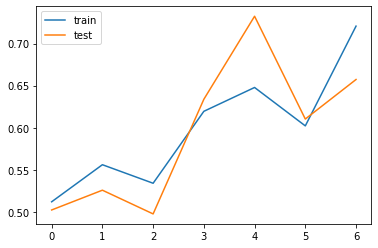

In [14]:
# evaluate the model
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))
# plot history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

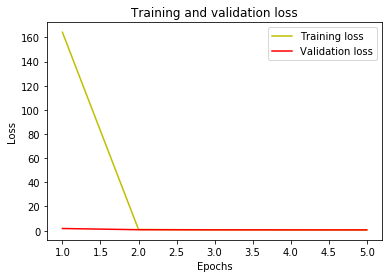

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

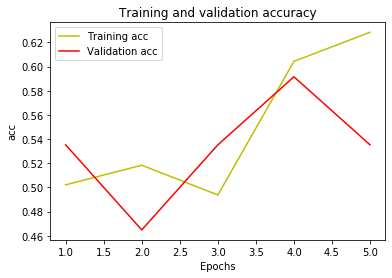

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=None)

In [0]:
from sklearn.metrics import auc

In [17]:
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier

nsamples, nx, ny, nz = X_train.shape
nsamplesx, nxx, nyx, nzx = X_test.shape
train_dataset = X_train.reshape((nsamples,nx*ny*nz))
test_dataset = X_test.reshape((nsamplesx,nxx*nyx*nzx))

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_dataset, y_train)

y_pred_rf = rf.predict_proba(test_dataset)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
auc = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


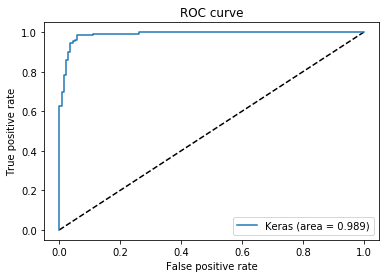

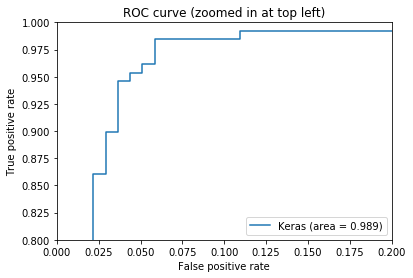

In [18]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, hamming_loss

accuracy_score(y_test,  y_pred.round(), normalize=True, sample_weight=None)
hamming_loss(y_test, y_pred.round())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix :\n', cm)

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print('Classioficaton Report :\n', classification_report(y_test, y_pred.round(), target_names=target_names))

from sklearn import metrics
print('Precision score:', metrics.precision_score(y_test, y_pred.round()))
print('Recall score:', metrics.recall_score(y_test, y_pred.round()))
print('f1_score :', metrics.f1_score(y_test, y_pred.round()))  
print('fbeta_score_0.5 :', metrics.fbeta_score(y_test, y_pred.round(), beta=0.5))
print('fbeta_score_1 :', metrics.fbeta_score(y_test, y_pred.round(), beta=1)) 
print('fbeta_score_2 :', metrics.fbeta_score(y_test, y_pred.round(), beta=2)) 
print('precision_recall_fscore_support :', metrics.precision_recall_fscore_support(y_test, y_pred.round(), beta=0.5))

Confusion Matrix :
 [[0.99270073 0.00729927]
 [0.78210117 0.21789883]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       0.58      0.99      0.73       274
     class 1       0.97      0.22      0.36       257

    accuracy                           0.62       531
   macro avg       0.77      0.61      0.54       531
weighted avg       0.76      0.62      0.55       531

Precision score: 0.9655172413793104
Recall score: 0.2178988326848249
f1_score : 0.35555555555555557
fbeta_score_0.5 : 0.5725971370143148
fbeta_score_1 : 0.35555555555555557
fbeta_score_2 : 0.2578268876611418
precision_recall_fscore_support : (array([0.57505285, 0.96551724]), array([0.99270073, 0.21789883]), array([0.6278855 , 0.57259714]), array([274, 257]))


In [0]:
y_pred[53]

array([0.5224269], dtype=float32)

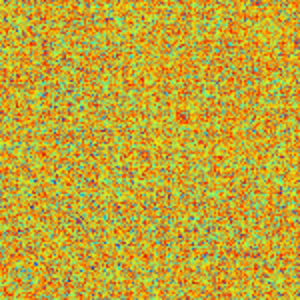

In [0]:
array_to_img(cv2.resize(X_test[53], (300, 300)))

In [0]:
y_pred[123]

array([0.76793814], dtype=float32)

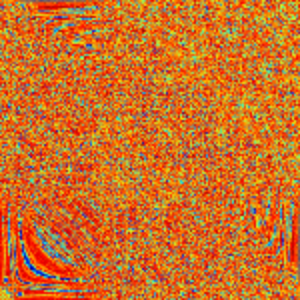

In [0]:
array_to_img(cv2.resize(X_test[123], (300, 300)))

In [0]:
import numpy as np
cal_bbh = 0
cal_glitch = 0
cal_unconclusive = 0

alist=[]
for fname in seta_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(seta_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]>0.5):
        cal_bbh+=1
    elif(pred_img[0]<0.5):
        cal_glitch+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("BBH :", cal_bbh)
print("Glitch :", cal_glitch)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_bbh/(cal_bbh+cal_unconclusive+cal_glitch))*100)
a = (cal_bbh/(cal_bbh+cal_unconclusive+cal_glitch))*100

Identified as: 

BBH : 1326
Glitch : 0
Inconclusive : 0
Percentage : 100.0


In [0]:
import numpy as np
cal_bbh = 0
cal_glitch = 0
cal_unconclusive = 0

alist=[]
for fname in setb_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setb_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]>0.5):
        cal_bbh+=1
    elif(pred_img[0]<0.5):
        cal_glitch+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("BBH :", cal_bbh)
print("Glitch :", cal_glitch)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_glitch/(cal_bbh+cal_unconclusive+cal_glitch))*100)
a = (cal_glitch/(cal_bbh+cal_unconclusive+cal_glitch))*100

Identified as: 

BBH : 1322
Glitch : 4
Inconclusive : 0
Percentage : 0.301659125188537


In [19]:
cal_bbh = 0
cal_glitch = 0
cal_unconclusive = 0
setc = 'TestData'
setc_data_dir = os.path.join(data_dir, setc)
setc_data_fnnames = os.listdir(setc_data_dir)

alist=[]
for fname in setc_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setc_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]>0.5):
        cal_bbh+=1
        alist.append(file_path)
        #print(alist)
    elif(pred_img[0]<0.5):
        cal_glitch+=1
        #alist.append(file_path)
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        #alist.append(file_path)
print(alist)

print("Identified as: \n")
print("BBH :", cal_bbh)
print("Glitch :", cal_glitch)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_glitch/(cal_bbh+cal_unconclusive+cal_glitch))*100)
a = (cal_glitch/(cal_bbh+cal_unconclusive+cal_glitch))*100

[]
Identified as: 

BBH : 0
Glitch : 133
Inconclusive : 0
Percentage : 100.0


In [0]:
setc = 'TestData'

data_dir = os.path.join(base_dir, 'Data')
setc_data_dir = os.path.join(data_dir, setc)
setc_data_fnnames = os.listdir(setc_data_dir)

q3 = np.empty((1, 150, 150, 3))
for c in range(1, len(setc_data_fnnames), 1):
  img_path_c = os.path.join(setc_data_dir, setc_data_fnnames[c])
  img_c = cv2.imread(os.path.join(setc_data_dir, setc_data_fnnames[c]))
  img_c = cv2.resize(img_c, (150, 150))
  q3 = np.vstack((q3, img_to_array(img_c).reshape(1, 150, 150, 3)))
  #t3 = np.zeros([len(setb_data_fnnames),1])

In [29]:
setc_data_fnnames[0]

'test_data_25.png'

In [33]:
alist = [[]]
for c in range(1, len(setc_data_fnnames), 1):
  alist.append([setc_data_fnnames[c], model.predict(q3[c].reshape(1, 150, 150, 3))])
print(alist)

[[], ['test_data_24.png', array([[0.48173115]], dtype=float32)], ['test_data_18.png', array([[0.49566045]], dtype=float32)], ['test_data_23.png', array([[0.48438722]], dtype=float32)], ['test_data_22.png', array([[0.47489125]], dtype=float32)], ['test_data_16.png', array([[0.43872148]], dtype=float32)], ['test_data_12.png', array([[0.45928645]], dtype=float32)], ['test_data_14.png', array([[0.5343847]], dtype=float32)], ['test_data_17.png', array([[0.4357568]], dtype=float32)], ['test_data_13.png', array([[0.44136956]], dtype=float32)], ['test_data_15.png', array([[0.45962098]], dtype=float32)], ['test_data_21.png', array([[0.5410118]], dtype=float32)], ['test_data_20.png', array([[0.4708102]], dtype=float32)], ['test_data_11.png', array([[0.45430985]], dtype=float32)], ['test_data_10.png', array([[0.4461889]], dtype=float32)], ['test_data_19.png', array([[0.4174329]], dtype=float32)], ['test_data_58.png', array([[0.43160045]], dtype=float32)], ['test_data_70.png', array([[0.4449884]],

In [0]:
import pandas as pd
df = pd.DataFrame(alist)
pd.set_option('display.max_rows', df.shape[0]+1)

df['FileName'] = df[0]

In [0]:
df['Probabilty'] = df[1]

In [0]:
df = df.drop(columns=[0, 1])

In [58]:
df[df['Probabilty']>=0.5]

,FileName,Probabilty
7,test_data_14.png,[[0.5343847]]
11,test_data_21.png,[[0.5410118]]
27,test_data_66.png,[[0.5071062]]
43,test_data_42.png,[[0.5017091]]
45,test_data_46.png,[[0.50434583]]
49,test_data_39.png,[[0.50922495]]
52,test_data_37.png,[[0.5004198]]
74,test_data_84.png,[[0.5120486]]
76,test_data_80.png,[[0.5091647]]
79,test_data_71.png,[[0.70733404]]


In [21]:
cal_bbh = 0
cal_glitch = 0
cal_unconclusive = 0

alist=[]
for c in range(1, len(setc_data_fnnames), 1):
  if model.predict(q3[[c]]) > 0.5:
    alist.append([setc_data_fnnames[c], 'b'])
    cal_bbh+=1
  elif(model.predict(q3[[c]]) < 0.5):
    alist.append([setc_data_fnnames[c], 'g'])
    cal_glitch+=1
  else:
    alist.append([setc_data_fnnames[c], 'u'])
    cal_unconclusive+=1

print(alist)
print("Identified as: \n")
print("BBH :", cal_bbh)
print("Glitch :", cal_glitch)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_bbh/(cal_bbh+cal_unconclusive+cal_glitch))*100)
a = (cal_bbh/(cal_bbh+cal_unconclusive+cal_glitch))*100

[['test_data_13.png', 'g'], ['test_data_22.png', 'g'], ['test_data_15.png', 'g'], ['test_data_14.png', 'g'], ['test_data_16.png', 'g'], ['test_data_17.png', 'g'], ['test_data_18.png', 'g'], ['test_data_20.png', 'g'], ['test_data_19.png', 'g'], ['test_data_21.png', 'g'], ['test_data_07.png', 'g'], ['test_data_26.png', 'g'], ['test_data_11.png', 'g'], ['test_data_27.png', 'g'], ['test_data_23.png', 'g'], ['test_data_28.png', 'g'], ['test_data_29.png', 'g'], ['test_data_30.png', 'g'], ['test_data_31.png', 'g'], ['test_data_24.png', 'g'], ['test_data_32.png', 'g'], ['test_data_33.png', 'g'], ['test_data_25.png', 'g'], ['test_data_34.png', 'g'], ['test_data_35.png', 'g'], ['test_data_36.png', 'g'], ['test_data_37.png', 'g'], ['test_data_38.png', 'g'], ['test_data_39.png', 'g'], ['test_data_44.png', 'g'], ['test_data_40.png', 'g'], ['test_data_45.png', 'g'], ['test_data_46.png', 'g'], ['test_data_47.png', 'g'], ['test_data_48.png', 'g'], ['test_data_41.png', 'g'], ['test_data_42.png', 'g'], 

In [22]:
import pandas as pd
df = pd.DataFrame(alist)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,0,1
0,test_data_13.png,g
1,test_data_22.png,g
2,test_data_15.png,g
3,test_data_14.png,g
4,test_data_16.png,g
5,test_data_17.png,g
6,test_data_18.png,g
7,test_data_20.png,g
8,test_data_19.png,g
9,test_data_21.png,g
